In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import numpy as np
from scipy.special import softmax

In [2]:
fish = pd.read_csv('midterm.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


/var/folders/8t/_x4yrtt90836wy7q0wr7sbkr0000gn/T/ipykernel_12588/1715685449.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fish.corr(),annot=True, cmap='coolwarm')


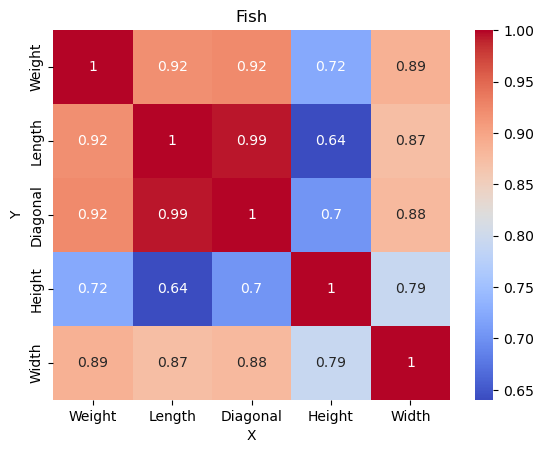

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#관계그래프 출력 상관관계확인하기 
sns.heatmap(fish.corr(),annot=True, cmap='coolwarm')
plt.title('Fish')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
#위 그래프를 보면 height과 관련된게 제일 안좋음 추론1
ss=StandardScaler()
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [6]:
#weight제거
fish_input=fish[['Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

train_input,test_input,train_target,test_target = train_test_split(
fish_input,fish_target,random_state=42)

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression(C=30,max_iter=1000)
lr.fit(train_scaled,train_target)
print('Weight제거')
print('train score')
print(lr.score(train_scaled,train_target))
print('test score')
print(lr.score(test_scaled,test_target))
print()

print('분류 정확도를 출력')
decision = lr.decision_function(test_scaled[:5])
proba = softmax(decision,axis=1)
print(lr.classes_)
print(np.round(proba,decimals=3))

Weight제거
train score
0.9327731092436975
test score
0.925

분류 정확도를 출력
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.008 0.886 0.    0.097 0.004 0.005]
 [0.    0.003 0.017 0.    0.023 0.957 0.   ]
 [0.    0.    0.022 0.916 0.006 0.056 0.   ]
 [0.005 0.025 0.252 0.004 0.638 0.    0.076]
 [0.    0.    0.928 0.003 0.065 0.003 0.001]]


In [7]:
#Length제거
fish_input2=fish[['Weight','Diagonal','Height','Width']].to_numpy()
fish_target2=fish['Species'].to_numpy()

train_input2,test_input2,train_target2,test_target2 = train_test_split(
fish_input2,fish_target2,random_state=42)

ss.fit(train_input2)
train_scaled2 = ss.transform(train_input2)
test_scaled2 = ss.transform(test_input2)

lr2 = LogisticRegression(C=40,max_iter=1000)
lr2.fit(train_scaled2,train_target2)
print('Length제거')
print('train score')
print(lr2.score(train_scaled2,train_target2))
print('test score')
print(lr2.score(test_scaled2,test_target2))
print()

print('분류 정확도를 출력')
decision2 = lr2.decision_function(test_scaled2[:5])
proba2 = softmax(decision2,axis=1)
print(lr2.classes_)
print(np.round(proba2,decimals=3))

Length제거
train score
0.907563025210084
test score
0.9

분류 정확도를 출력
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.011 0.786 0.    0.197 0.004 0.002]
 [0.    0.001 0.027 0.    0.003 0.97  0.   ]
 [0.    0.    0.013 0.919 0.045 0.023 0.   ]
 [0.005 0.031 0.275 0.005 0.61  0.    0.074]
 [0.    0.    0.927 0.002 0.069 0.001 0.   ]]


In [8]:
#Diagonal제거
fish_input3=fish[['Weight','Length','Height','Width']].to_numpy()
fish_target3=fish['Species'].to_numpy()

train_input3,test_input3,train_target3,test_target3 = train_test_split(
fish_input3,fish_target3,random_state=42)

ss.fit(train_input3)
train_scaled3 = ss.transform(train_input3)
test_scaled3 = ss.transform(test_input3)

lr3 = LogisticRegression(C=40,max_iter=1000)
lr3.fit(train_scaled3,train_target3)
print('Diagonal제거')
print('train score')
print(lr3.score(train_scaled3,train_target3))
print('test score')
print(lr3.score(test_scaled3,test_target3))
print()

print('분류 정확도를 출력')
decision3 = lr3.decision_function(test_scaled3[:5])
proba3 = softmax(decision3,axis=1)
print(lr3.classes_)
print(np.round(proba3,decimals=3))

Diagonal제거
train score
0.8823529411764706
test score
0.875

분류 정확도를 출력
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.008 0.632 0.001 0.351 0.006 0.002]
 [0.    0.002 0.033 0.    0.002 0.963 0.   ]
 [0.    0.    0.015 0.978 0.    0.007 0.   ]
 [0.005 0.037 0.22  0.002 0.647 0.    0.089]
 [0.    0.    0.965 0.006 0.027 0.001 0.   ]]


In [9]:
#Height제거
fish_input4=fish[['Weight','Length','Diagonal','Width']].to_numpy()
fish_target4=fish['Species'].to_numpy()

train_input4,test_input4,train_target4,test_target4 = train_test_split(
fish_input4,fish_target4,random_state=42)

ss.fit(train_input4)
train_scaled4 = ss.transform(train_input4)
test_scaled4 = ss.transform(test_input4)

lr4 = LogisticRegression(C=60,max_iter=1000)
lr4.fit(train_scaled4,train_target4)
print('Height제거')
print('train score')
print(lr4.score(train_scaled4,train_target4))
print('test score')
print(lr4.score(test_scaled4,test_target4))
print()

print('분류 정확도를 출력')
decision4 = lr4.decision_function(test_scaled4[:5])
proba4 = softmax(decision4,axis=1)
print(lr4.classes_)
print(np.round(proba4,decimals=3))

Height제거
train score
0.907563025210084
test score
0.9

분류 정확도를 출력
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.022 0.928 0.    0.048 0.    0.001]
 [0.    0.021 0.004 0.    0.    0.974 0.   ]
 [0.008 0.001 0.    0.99  0.    0.001 0.   ]
 [0.091 0.16  0.456 0.002 0.246 0.    0.045]
 [0.004 0.058 0.777 0.    0.153 0.    0.007]]


In [10]:
#Width제거
fish_input5=fish[['Weight','Length','Diagonal','Height']].to_numpy()
fish_target5=fish['Species'].to_numpy()

train_input5,test_input5,train_target5,test_target5 = train_test_split(
fish_input5,fish_target5,random_state=42)

ss.fit(train_input5)
train_scaled5 = ss.transform(train_input5)
test_scaled5 = ss.transform(test_input5)

lr5 = LogisticRegression(C=20,max_iter=1000)
lr5.fit(train_scaled5,train_target5)
print('train score')
print(lr5.score(train_scaled5,train_target5))
print('test score')
print(lr5.score(test_scaled5,test_target5))
print()

print('분류 정확도를 출력')
decision5 = lr5.decision_function(test_scaled5[:5])
proba5 = softmax(decision5,axis=1)
print(lr5.classes_)
print(np.round(proba5,decimals=3))

train score
0.9495798319327731
test score
0.925

분류 정확도를 출력
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.028 0.8   0.    0.144 0.024 0.003]
 [0.    0.002 0.207 0.    0.02  0.772 0.   ]
 [0.    0.    0.176 0.778 0.043 0.002 0.   ]
 [0.008 0.032 0.401 0.002 0.473 0.    0.083]
 [0.    0.001 0.857 0.003 0.123 0.014 0.003]]


In [11]:
#결론 Width를 제거 했을 경우가 가장 높은값을 가지며 Diagonal를 제거 했을 때 가장 낮은 정확도를 보여준다

In [13]:
ss=StandardScaler()
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

#weight제거
fish_input=fish[['Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

train_input,test_input,train_target,test_target = train_test_split(
fish_input,fish_target,random_state=42)

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression(C=30,max_iter=1000)
lr.fit(train_scaled,train_target)
print('Weight제거')
print('train score')
print(lr.score(train_scaled,train_target))
print('test score')
print(lr.score(test_scaled,test_target))
print('분류 정확도를 출력')
decision = lr.decision_function(test_scaled[:5])
proba = softmax(decision,axis=1)
print(lr.classes_)
print(np.round(proba,decimals=3))

#Length제거
fish_input2=fish[['Weight','Diagonal','Height','Width']].to_numpy()
fish_target2=fish['Species'].to_numpy()

train_input2,test_input2,train_target2,test_target2 = train_test_split(
fish_input2,fish_target2,random_state=42)

ss.fit(train_input2)
train_scaled2 = ss.transform(train_input2)
test_scaled2 = ss.transform(test_input2)

lr2 = LogisticRegression(C=40,max_iter=1000)
lr2.fit(train_scaled2,train_target2)
print()
print('Length제거')
print('train score')
print(lr2.score(train_scaled2,train_target2))
print('test score')
print(lr2.score(test_scaled2,test_target2))

print('분류 정확도를 출력')
decision2 = lr2.decision_function(test_scaled2[:5])
proba2 = softmax(decision2,axis=1)
print(lr2.classes_)
print(np.round(proba2,decimals=3))

#Diagonal제거
fish_input3=fish[['Weight','Length','Height','Width']].to_numpy()
fish_target3=fish['Species'].to_numpy()

train_input3,test_input3,train_target3,test_target3 = train_test_split(
fish_input3,fish_target3,random_state=42)

ss.fit(train_input3)
train_scaled3 = ss.transform(train_input3)
test_scaled3 = ss.transform(test_input3)

lr3 = LogisticRegression(C=40,max_iter=1000)
lr3.fit(train_scaled3,train_target3)
print()
print('Diagonal제거')
print('train score')
print(lr3.score(train_scaled3,train_target3))
print('test score')
print(lr3.score(test_scaled3,test_target3))

print('분류 정확도를 출력')
decision3 = lr3.decision_function(test_scaled3[:5])
proba3 = softmax(decision3,axis=1)
print(lr3.classes_)
print(np.round(proba3,decimals=3))

#Height제거
fish_input4=fish[['Weight','Length','Diagonal','Width']].to_numpy()
fish_target4=fish['Species'].to_numpy()

train_input4,test_input4,train_target4,test_target4 = train_test_split(
fish_input4,fish_target4,random_state=42)

ss.fit(train_input4)
train_scaled4 = ss.transform(train_input4)
test_scaled4 = ss.transform(test_input4)

lr4 = LogisticRegression(C=60,max_iter=1000)
lr4.fit(train_scaled4,train_target4)

print()
print('Height제거')
print('train score')
print(lr4.score(train_scaled4,train_target4))
print('test score')
print(lr4.score(test_scaled4,test_target4))

print('분류 정확도를 출력')
decision4 = lr4.decision_function(test_scaled4[:5])
proba4 = softmax(decision4,axis=1)
print(lr4.classes_)
print(np.round(proba4,decimals=3))

#Width제거
fish_input5=fish[['Weight','Length','Diagonal','Height']].to_numpy()
fish_target5=fish['Species'].to_numpy()

train_input5,test_input5,train_target5,test_target5 = train_test_split(
fish_input5,fish_target5,random_state=42)

ss.fit(train_input5)
train_scaled5 = ss.transform(train_input5)
test_scaled5 = ss.transform(test_input5)

lr5 = LogisticRegression(C=20,max_iter=1000)
lr5.fit(train_scaled5,train_target5)
print()
print('Width제거')
print('train score')
print(lr5.score(train_scaled5,train_target5))
print('test score')
print(lr5.score(test_scaled5,test_target5))


print('분류 정확도를 출력')
decision5 = lr5.decision_function(test_scaled5[:5])
proba5 = softmax(decision5,axis=1)
print(lr5.classes_)
print(np.round(proba5,decimals=3))

Weight제거
train score
0.9327731092436975
test score
0.925
분류 정확도를 출력
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.008 0.886 0.    0.097 0.004 0.005]
 [0.    0.003 0.017 0.    0.023 0.957 0.   ]
 [0.    0.    0.022 0.916 0.006 0.056 0.   ]
 [0.005 0.025 0.252 0.004 0.638 0.    0.076]
 [0.    0.    0.928 0.003 0.065 0.003 0.001]]

Length제거
train score
0.907563025210084
test score
0.9
분류 정확도를 출력
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.011 0.786 0.    0.197 0.004 0.002]
 [0.    0.001 0.027 0.    0.003 0.97  0.   ]
 [0.    0.    0.013 0.919 0.045 0.023 0.   ]
 [0.005 0.031 0.275 0.005 0.61  0.    0.074]
 [0.    0.    0.927 0.002 0.069 0.001 0.   ]]

Diagonal제거
train score
0.8823529411764706
test score
0.875
분류 정확도를 출력
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.008 0.632 0.001 0.351 0.006 0.002]
 [0.    0.002 0.033 0.    0.002 0.963 0.   ]
 [0.    0.    0.015 0.978 0.    0.007 0.   ]
 [0.005 0.037 0.22  0.